In [14]:
!pip install scikit-learn
!pip install seaborn
!pip install h5

In [28]:
!pip install shap

  Using cached shap-0.50.0-cp312-cp312-manylinux2014_x86_64.manylinux_2_17_x86_64.manylinux_2_28_x86_64.whl.metadata (25 kB)
  Using cached slicer-0.0.8-py3-none-any.whl.metadata (4.0 kB)
Using cached shap-0.50.0-cp312-cp312-manylinux2014_x86_64.manylinux_2_17_x86_64.manylinux_2_28_x86_64.whl (1.1 MB)
Using cached slicer-0.0.8-py3-none-any.whl (15 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 13.5 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 15.1 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4/4 [shap]3/4 [shap]]te]


In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import h5py
import shap

In [18]:
file = '/home/idies/workspace/Storage/dyu/persistent/full_1800_stats.h5'

with h5py.File(file, 'r') as f:
    X = f['phi_stats'][:]
    y = f['is_pulsar'][:]

In [19]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y     # important for imbalanced data
)

In [20]:
# sm = SMOTE(random_state=42)
# X_train_res, y_train_res = sm.fit_resample(X_train, y_train)
# y_train.value_counts(), y_train_res.value_counts()

# neg = np.sum(y_train == 0)   # count of class 0 (bh)
# pos = np.sum(y_train == 1)   # count of class 1 (pulsar)

# ratio = neg / pos
# ratio

In [24]:
clf = LogisticRegression(class_weight='balanced', max_iter=1000)
clf.fit(X_train,y_train)
print("Logistic Regression Score: %.3f"%clf.score(X_train,y_train))

Logistic Regression Score: 0.711


In [25]:
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.69      0.78     50187
           1       0.47      0.77      0.59     18293

    accuracy                           0.71     68480
   macro avg       0.68      0.73      0.68     68480
weighted avg       0.78      0.71      0.73     68480



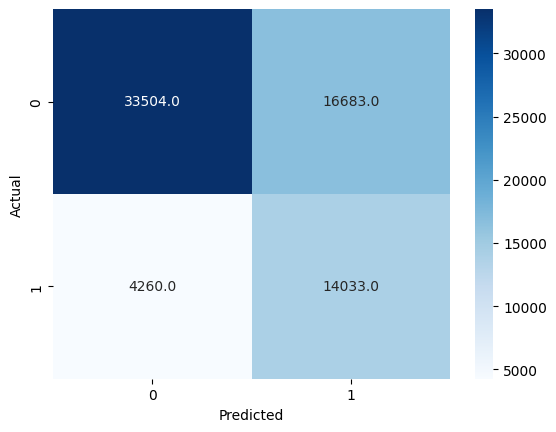

In [23]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues', fmt=".1f")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [53]:
# the precision for bh is low suggesting that we are missclassifying a lot of bh (0) as pulsars (1)

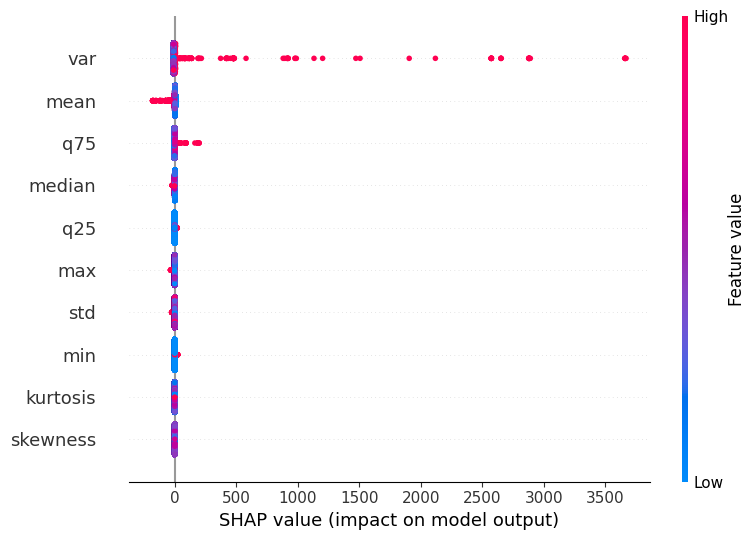

In [33]:
explainer = shap.LinearExplainer(clf, X_train)
shap_values = explainer.shap_values(X_test)

if isinstance(shap_values, list):
    shap_values = shap_values[1]

names = ['mean','std','min','q25','median','q75','max','var','skewness','kurtosis']
X_test_df = pd.DataFrame(X_test, columns=names)


shap.summary_plot(shap_values, X_test_df)

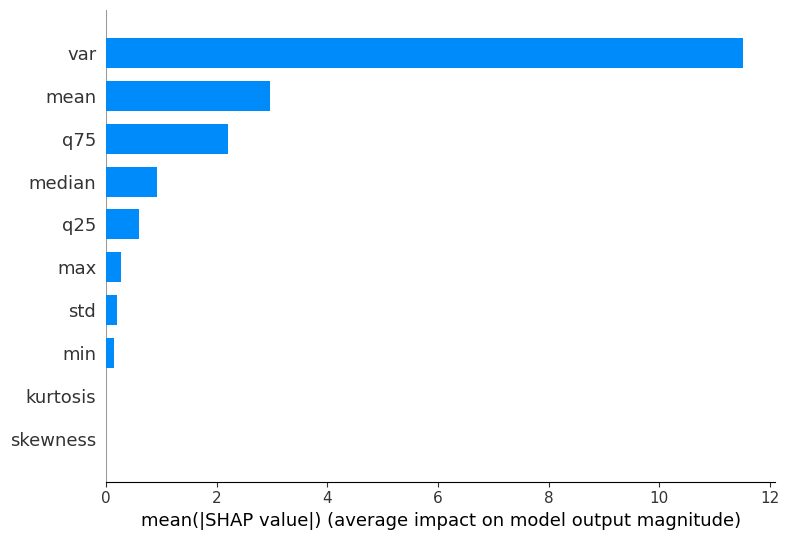

In [38]:
shap.summary_plot(shap_values, X_test_df, plot_type="bar")

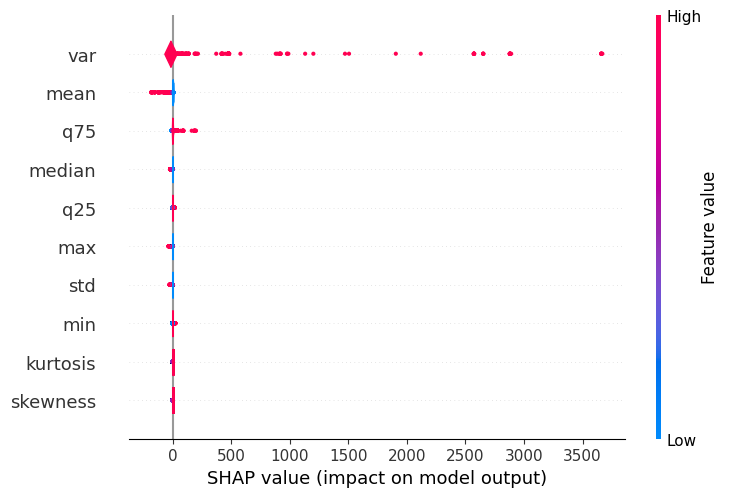

In [37]:
shap.plots.violin(shap_values, features=X_test_df, feature_names=names, plot_type="violin")

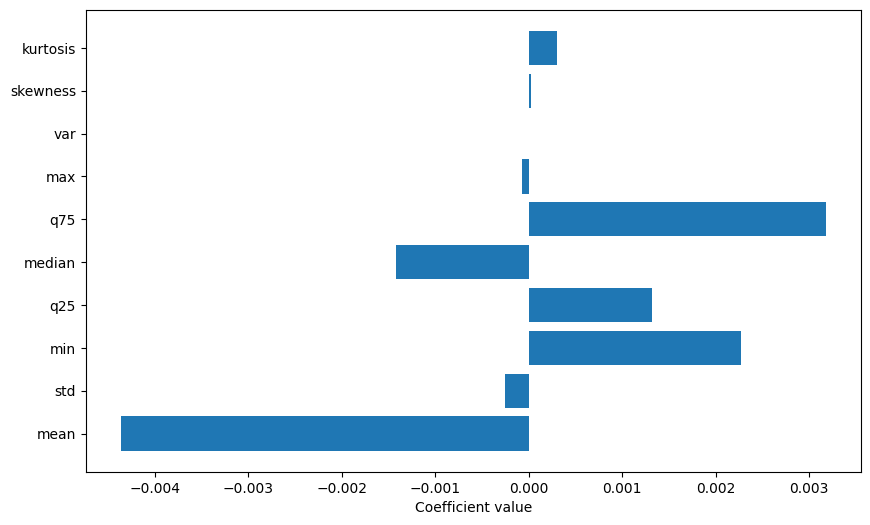

In [49]:
coefs = clf.coef_[0]     # logistic regression coefficients
features = names

plt.figure(figsize=(10, 6))
plt.barh(features, coefs)
plt.xlabel("Coefficient value")
plt.show()

In [ ]:
# Source - https://stackoverflow.com/a
# Posted by Eddy Piedad, modified by community. See post 'Timeline' for change history
# Retrieved 2025-12-03, License - CC BY-SA 4.0
import sys
from io import StringIO
import numpy as np


old_stdout = sys.stdout
sys.stdout = mystdout = StringIO()
clf = LogisticRegression(class_weight='balanced', max_iter=1000, verbose=1)
clf.fit(X_train, y_train)
sys.stdout = old_stdout
loss_history = mystdout.getvalue()
loss_list = []
for line in loss_history.split('\n'):
    if(len(line.split("loss: ")) == 1):
        continue
    loss_list.append(float(line.split("loss: ")[-1]))


In [ ]:
plt.figure()
plt.plot(np.arange(len(loss_list)), loss_list)
# plt.savefig("warmstart_plots/pure_LogRes:"+".png")
plt.xlabel("Time in epochs")
plt.ylabel("Loss")
# plt.close()